# Homework 8

# Feature Selection and Dimention Reduction. PCA

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gender Recognition by Voice

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

The following acoustic properties of each voice are measured and included within the CSV:

* meanfreq: mean frequency (in kHz)
* sd: standard deviation of frequency
* median: median frequency (in kHz)
* Q25: first quantile (in kHz)
* Q75: third quantile (in kHz)
* IQR: interquantile range (in kHz)
* skew: skewness (see note in specprop description)
* kurt: kurtosis (see note in specprop description)
* sp.ent: spectral entropy
* sfm: spectral flatness
* mode: mode frequency
* centroid: frequency centroid (see specprop)
* peakf: peak frequency (frequency with highest energy)
* meanfun: average of fundamental frequency measured across acoustic signal
* minfun: minimum fundamental frequency measured across acoustic signal
* maxfun: maximum fundamental frequency measured across acoustic signal
* meandom: average of dominant frequency measured across acoustic signal
* mindom: minimum of dominant frequency measured across acoustic signal
* maxdom: maximum of dominant frequency measured across acoustic signal
* dfrange: range of dominant frequency measured across acoustic signal
* modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
* label: male or female

In [ ]:
!wget -O 'voice.csv' -q 'https://www.dropbox.com/scl/fi/2gpi4tivaetc2z217d6ch/voice.csv?rlkey=xr4qslh9fmao94aiyimwcdkd2&dl=0'

In [ ]:
# Read data sample
data = pd.read_csv("voice.csv")
print("DataFrame shape: ", data.shape)
data.head()

DataFrame shape:  (3168, 21)


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Data Preparation


In [ ]:
# Get feature names
feature_names = data.columns.drop(['label'])
print("Feature names: ", feature_names)

Feature names:  Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')


In [ ]:
# Prepare X and y
X = data[feature_names].values
y = 1. * (data['label'].values == 'male')

## Train / Test Split + Standardization

We perform standartization to provide you possibility to use any classifier you know without any difficulties induced by feature scales.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Standardization
ss = StandardScaler()
ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

## Classifier Selection

Generally, tasks below can be done with any classifier, but we ask you to provide answers with Decision Tree classifier with the following hyperparameters (don't touch this):

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Task 1 (1 point)

Find just **one** feature, that provides the best classification accuracy. What is the name of this feature? Save name in variable first_best_feature and go through assert

Hint: in **for** loop use one feature in the sample to train the classifier. Then, calculate the classification accuracy on the test sample.

In [ ]:
feature_names[12]

'meanfun'

In [ ]:
# Your code is here.
from sklearn.metrics import accuracy_score

best_accuracy = 0
first_best_feature = None

# Перебираем все признаки
for feature in feature_names:
    # Обучаем классификатор, используя только один признак
    clf.fit(X_train[:, feature_names.get_loc(feature)].reshape(-1, 1), y_train)

    # Вычисляем точность на тестовой выборке
    accuracy = accuracy_score(y_test, clf.predict(X_test[:, feature_names.get_loc(feature)].reshape(-1, 1)))

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        first_best_feature = feature

# Выводим название наилучшего признака
print("Best feature:", first_best_feature)
# Best feature: meanfun

Best feature: meanfun


In [ ]:
assert(first_best_feature == 'meanfun')

# Task 2 (1 point)

Now you know the first best feature of the sample. In this task you need to find the second best feature. What are the names of these features?

Save answer in variables first_best_feature and second_best_feature and go through assert

Hint: in **for** loop use **two** features to train the classifier. One of the two features is the found best feature from Task 1, the second feature is a new one.

In [ ]:
# Your code is here.
second_best_accuracy = 0
second_best_feature = None

first_best_feature = 'meanfun'

for feature in feature_names:
    if feature != first_best_feature:
        # Используем два признака: 'meanfun' и текущий признак
        features_to_use = [feature_names.get_loc(first_best_feature), feature_names.get_loc(feature)]
        clf.fit(X_train[:, features_to_use], y_train)

        # Вычисление точности на тестовой выборке
        accuracy = accuracy_score(y_test, clf.predict(X_test[:, features_to_use]))

        # Обновление лучшей точности и второго признака при необходимости
        if accuracy > second_best_accuracy:
            second_best_accuracy = accuracy
            second_best_feature = feature

print("First best feature:", first_best_feature)
print("Second best feature:", second_best_feature)

#First best feature: meanfun
#Second best feature: Q75

First best feature: meanfun
Second best feature: Q75


In [ ]:
assert(first_best_feature == 'meanfun' and second_best_feature == 'Q75')

# Task 3 (3 points)

Great! As you can guess, now your task is to find the best 3 features, the best 4 features, ...., the best 20 features :) Use the silimilar approach as in Task 2.

For the each N best features calculate the classification accuracy. Plot dependency of the accuracy from N. Print list of the following pairs of values: (Name of the N-th best feature, accuracy).

The output example:

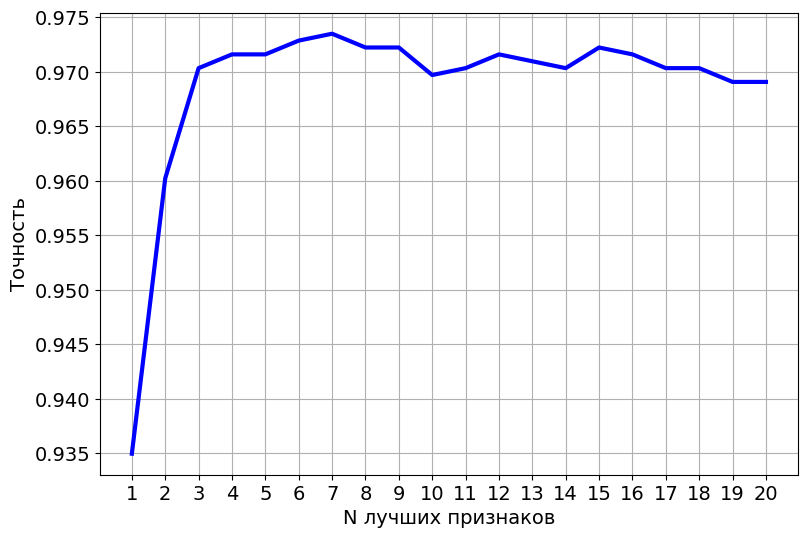

        Name  Accuracy
0    meanfun  0.934975
1        Q75  0.960227
2        IQR  0.970328
3     sp.ent  0.971591
4     minfun  0.971591
5       mode  0.972854
6       kurt  0.973485
7       skew  0.972222
8     maxfun  0.972222
9     mindom  0.969697
10       Q25  0.970328
11  meanfreq  0.971591
12        sd  0.970960
13       sfm  0.970328
14    median  0.972222
15  centroid  0.971591
16    maxdom  0.970328
17   meandom  0.970328
18   dfrange  0.969066
19   modindx  0.969066


In [ ]:
from sklearn.metrics import accuracy_score

# Инициализируем список для хранения лучших признаков и их точностей
n_best_features = list()
n_best_accuracies = list()

# Начинаем с лучшего признака из предыдущего задания
current_best_features = ['meanfun']

# Вычисляем точность для 1 лучшего признака
clf.fit(X_train[:, feature_names.get_loc(current_best_features[0])].reshape(-1, 1), y_train)
accuracy = accuracy_score(y_test, clf.predict(X_test[:, feature_names.get_loc(current_best_features[0])].reshape(-1, 1)))
n_best_features.append(current_best_features[0])
n_best_accuracies.append(accuracy)

# Ищем лучшие признаки для N от 2 до 20
for N in range(2, 21):
    best_feature = None
    best_accuracy = 0

    for feature in feature_names:
        if feature not in current_best_features:
            # Проверяем комбинацию текущих лучших признаков с новым признаком
            test_features = current_best_features + [feature]
            test_features_idx = [feature_names.get_loc(f) for f in test_features]
            clf.fit(X_train[:, test_features_idx], y_train)
            accuracy = accuracy_score(y_test, clf.predict(X_test[:, test_features_idx]))

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_feature = feature

    # Добавляем новый лучший признак и его точность
    current_best_features.append(best_feature)
    n_best_accuracies.append(best_accuracy)

# Подготовка данных для отчета и построения графика
n_best_features.extend(current_best_features[1:])  # Уже имеем 1 лучший признак
n_best_features_idx = [feature_names.get_loc(f) for f in n_best_features]

# Построение графика
plt.figure(figsize=(9, 6))
plt.plot(range(1, 21), n_best_accuracies, color='b', linewidth=3)
plt.xticks(range(1, 21), size=14)
plt.xlabel("N лучших признаков", size=14)
plt.yticks(size=14)
plt.ylabel("Точность", size=14)
plt.grid()
plt.show()

# Формирование отчета
report = pd.DataFrame()
report['Name'] = n_best_features
report['Accuracy'] = n_best_accuracies
print(report)

assert list(report['Name']) == ['meanfun', 'Q75', 'IQR', 'sp.ent', 'minfun', 'mode', 'kurt', 'skew', 'maxfun', 'mindom', 'Q25', 'meanfreq', 'sd', 'sfm', 'median', 'centroid', 'maxdom', 'meandom', 'dfrange', 'modindx']

# Task 4 (3 points)

Well, now let's use PCA. Plot the dependency of the classification accuracy from the number of components of PCA. Vary the number of components from 1 to 20. Do you have the same accuracies for one PCA component and for the first best feature from Task 1? How do you explain it?

In this task you can use PCA from sklearn

The output example:

**Ответ на задание**

Я думаю, можно сделать вывод о том, что точность классификации действительно зависит от числа используемых компонент PCA. С увеличением числа компонент точность сначала увеличивается значительно, а затем выходит на плато, что указывает на то, что основная доля информативности данных содержится уже в первых нескольких компонентах.

Что касается сравнения точности одного компонента PCA и лучшего признака из Задания 1 ('meanfun'), то можно сказать, что они схожи, что может говорить о том, что 'meanfun' является очень значимым признаком и большая часть информации, которая позволяет различать классы, содержится именно в этом признаке. Однако точность PCA меньше чем точность первых N компонент, однако это и логично, поскольку цель PCA изначально это не достижение наибольшей accuracy.



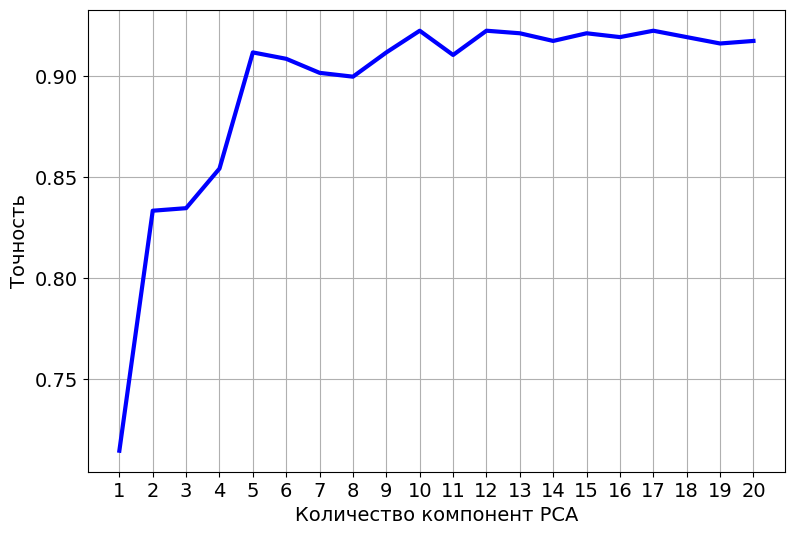

In [ ]:
from sklearn.decomposition import PCA

pca_accuracies = []

# Применение PCA с разным числом компонент от 1 до 20 и вычисление точности классификации
for n_components in range(1, 21):
    # Инициализация и применение PCA
    pca = PCA(n_components=n_components)
    pca.fit(X_train)

    # Трансформация данных
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Обучение классификатора и вычисление точности
    clf.fit(X_train_pca, y_train)
    accuracy = accuracy_score(y_test, clf.predict(X_test_pca))
    pca_accuracies.append(accuracy)

# Построение графика зависимости точности от числа компонент PCA
pca_components = np.arange(1, 21)
plt.figure(figsize=(9, 6))
plt.plot(pca_components, pca_accuracies, color='b', linewidth=3)
plt.xticks(pca_components, size=14)
plt.xlabel("Количество компонент PCA", size=14)
plt.yticks(size=14)
plt.ylabel("Точность", size=14)
plt.grid()
plt.show()


# Task 5 (2 points)

Plot explained variance and cumulative explained variance for the PCA at every number of components.

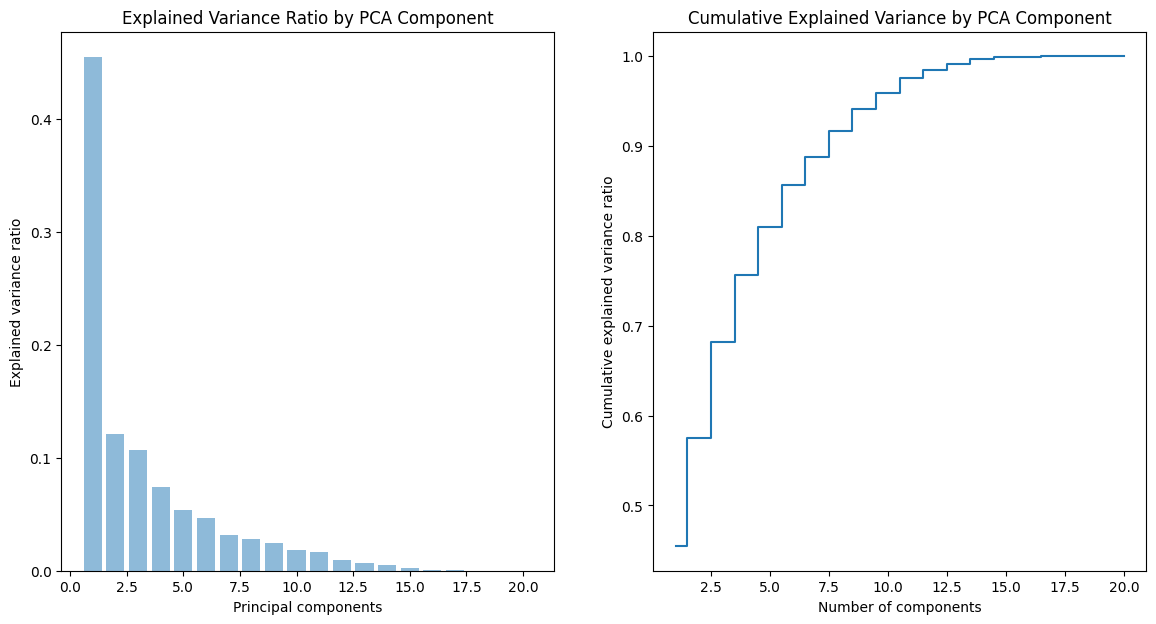

In [ ]:
pca_full = PCA()
pca_full.fit(X_train)

# Calculate explained variance and cumulative explained variance
explained_variance = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Plotting the explained variance for each component
plt.figure(figsize=(14, 7))

# Explained variance plot
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained Variance Ratio by PCA Component')

# Cumulative explained variance plot
plt.subplot(1, 2, 2)
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid')
plt.ylabel('Cumulative explained variance ratio')
plt.xlabel('Number of components')
plt.title('Cumulative Explained Variance by PCA Component')

plt.show()
